In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings

warnings.filterwarnings("ignore")






data_dir = "C:/cv/xray/Curated X-Ray Dataset"

print(os.listdir(data_dir))

['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral']


100%|█████████████████████████████████████████████████████████████████████████████| 1656/1656 [00:06<00:00, 255.57it/s]


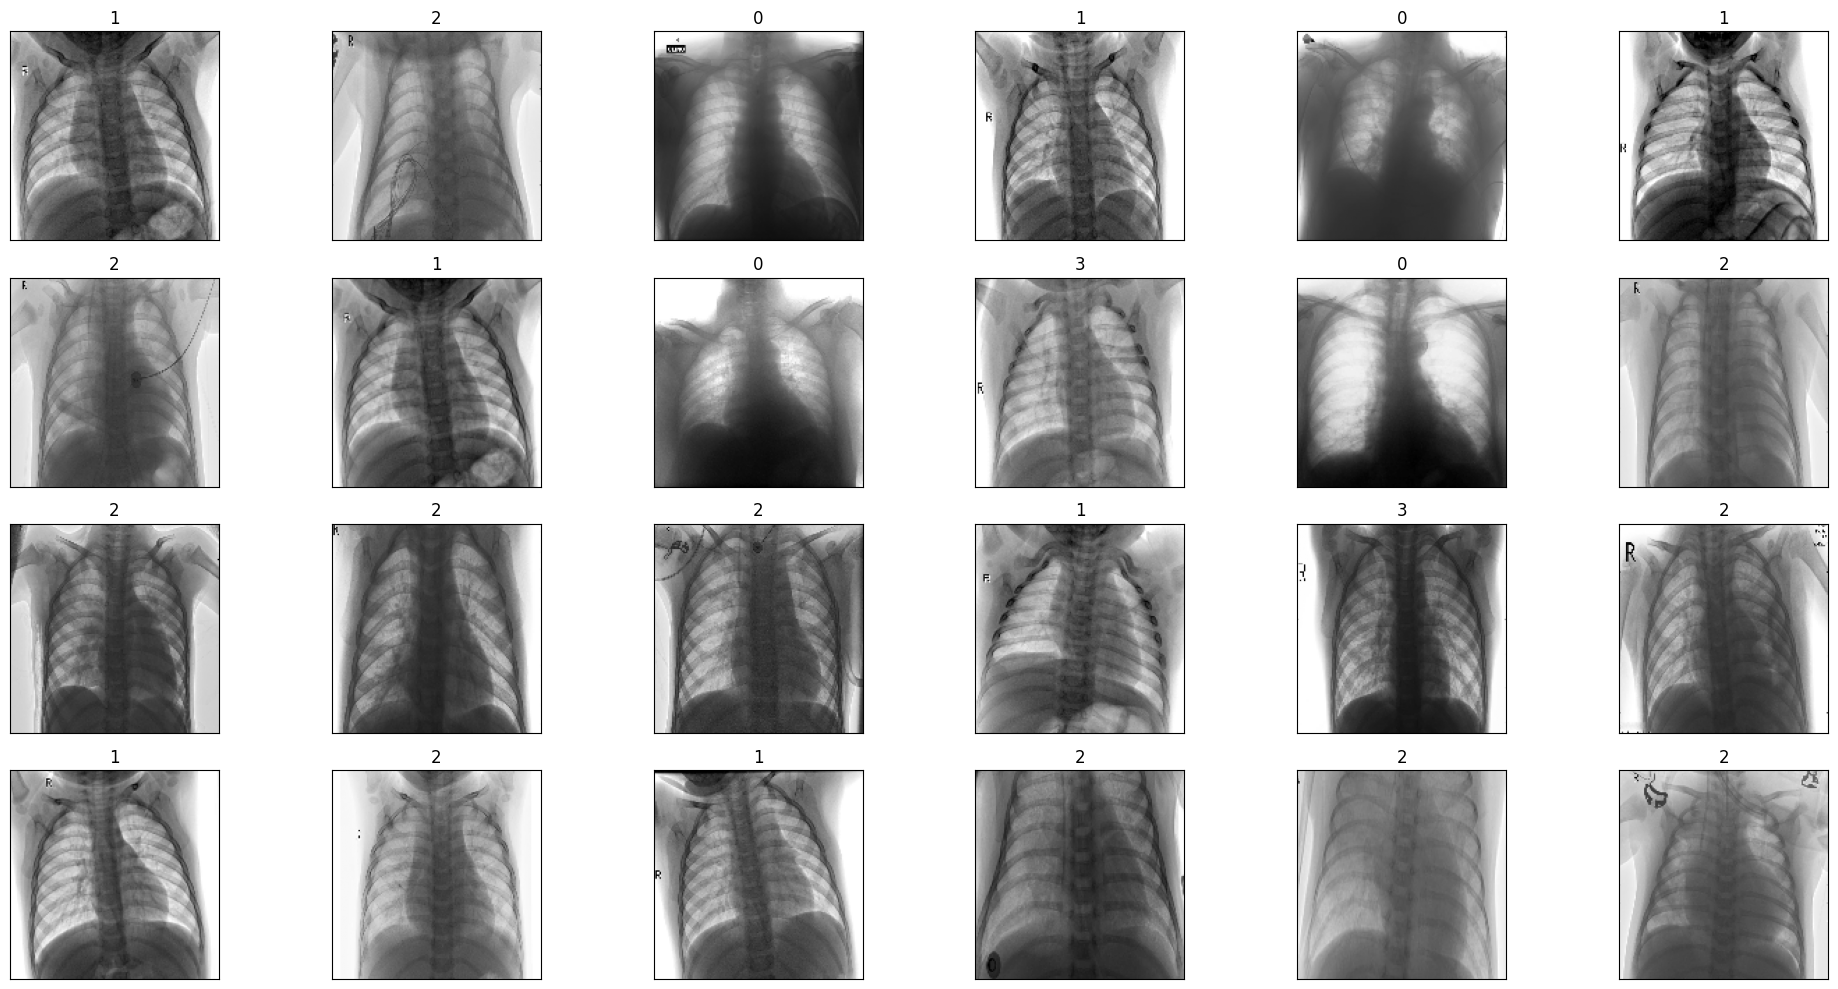

In [2]:

labels = ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral']


image_size = 150



data = []

for i in labels:
    path = os.path.join(data_dir,i)
    for j in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,j),cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img, (image_size,image_size))
        data.append([img_array,i])



X = []
y = []

for features,labels in data:
    X.append(features)
    y.append(labels)




le = LabelEncoder()


X = np.array(X,dtype='float32') / 255.0
X = X.reshape(-1,image_size,image_size,1)
y = np.array(y)
y = le.fit_transform(y)




X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


index = np.random.choice(np.arange(len(X_train)),24,replace=False)

fig,axs = plt.subplots(4,6,figsize=(20,10))

for item in zip(axs.ravel(),X_train[index],y_train[index]):
    axs,image,target = item
    axs.imshow(image,plt.cm.gray_r)
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(target)


plt.tight_layout()
plt.show()

In [3]:


y_train = to_categorical(y_train,num_classes=4)
y_test = to_categorical(y_test,num_classes=4)



X_train.shape,X_test.shape








CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(150,150,1)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))


CNN.add(Conv2D(filters=256,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Flatten())


CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(4,activation='softmax'))
CNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)
loss,acc = CNN.evaluate(X_test,y_test)
pred = CNN.predict(X_test)
loss,acc = CNN.evaluate(X_test,y_test)
print(f'testing loss: {loss*100:.2f}%')
print(f'testing accuracy: {acc*100:.2f}%')

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 78s 362ms/step - accuracy: 0.6860 - loss: 2.5276 - val_accuracy: 0.2103 - val_loss: 5.1845
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 77s 370ms/step - accuracy: 0.8344 - loss: 0.4308 - val_accuracy: 0.3691 - val_loss: 3.0655
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 78s 377ms/step - accuracy: 0.8451 - loss: 0.3743 - val_accuracy: 0.8195 - val_loss: 0.5129
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 78s 376ms/step - accuracy: 0.8399 - loss: 0.3566 - val_accuracy: 0.8412 - val_loss: 0.4319
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 79s 377ms/step - accuracy: 0.8676 - loss: 0.3069 - val_accuracy: 0.8046 - val_loss: 0.5628
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 78s 374ms/step - accuracy: 0.8655 - loss: 0.3123 - val_accuracy: 0.7829 - val_loss: 0.7709
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 78s 376ms/step - accuracy: 0.8761 - loss: 0.2727 - val_accuracy: 0.7720 - val_loss: 0.6362
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 77s 370ms/step - accuracy: 0.8933 - loss: 0

Accuracy score: 82.90%
classification report:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       266
           1       0.99      0.91      0.95       646
           2       0.70      0.91      0.79       588
           3       0.71      0.41      0.52       342

    accuracy                           0.83      1842
   macro avg       0.83      0.80      0.80      1842
weighted avg       0.84      0.83      0.82      1842
%


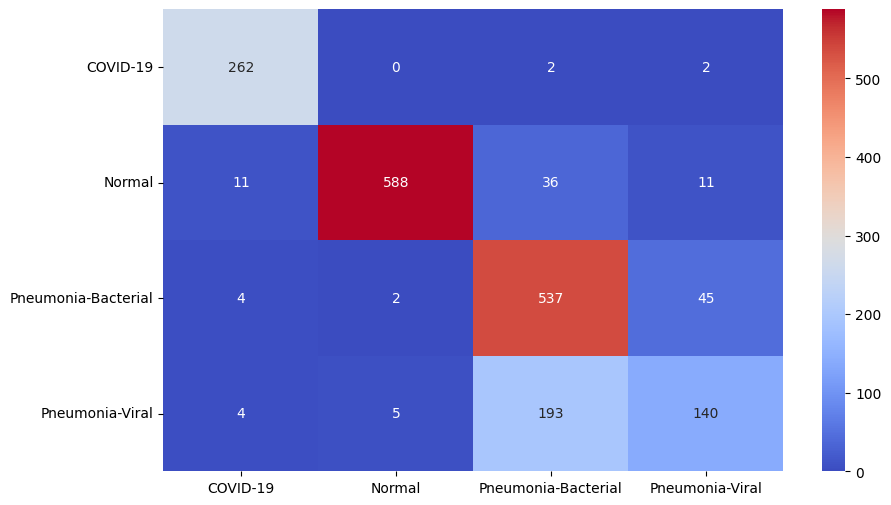

In [4]:
y_pred = np.argmax(pred,axis= -1)
y_test = np.argmax(y_test,axis= -1)



acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc*100:.2f}%')


clf_rpt = classification_report(y_test, y_pred)
print(f'classification report: {clf_rpt}%')


cm= confusion_matrix(y_test,y_pred)

def plot_confusion_matrix(y_test,y_pred):
    return sns.heatmap(cm,fmt='d',cmap='coolwarm',annot=True,xticklabels=['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral'],yticklabels=['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral'])


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test, y_pred)
plt.show()

